In [330]:
%pip install keras-tuner

  Using cached keras_tuner-1.4.7-py3-none-any.whl.metadata (5.4 kB)
  Using cached kt_legacy-1.0.5-py3-none-any.whl.metadata (221 bytes)
Using cached keras_tuner-1.4.7-py3-none-any.whl (129 kB)
Using cached kt_legacy-1.0.5-py3-none-any.whl (9.6 kB)

   ---------------------------------------- 0/2 [kt-legacy]
   ---------------------------------------- 0/2 [kt-legacy]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   -------------------- ------------------- 1/2 [keras-tuner]
   ---------------------------------------- 2/2 [keras-tuner]

Note: you

In [205]:
%pip install nbformat

  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached fastjsonschema-2.21.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached jsonschema_specifications-2025.4.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached referencing-0.36.2-py3-none-any.whl.metadata (2.8 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
Using cached fastjsonschema-2.21.1-py3-none-any.whl (23 kB)
Using cached attrs-25.3.0-py3-none-any.whl (63 kB)
Using cached jsonschema_specifications-2025.4.1-py3-none-any.whl (18 kB)
Using cached referencing-0.36.2-py3-none-any.whl (26 kB)

   ---------------------------------------- 0/7 [fastjsonschema]
   ----------- ---------------------------- 2/7 [attrs]
   ----------- ---------------------------- 2/7 [attrs]
   ----------- ---------------------------- 2/7 [attrs]
   ----------------- ---------------------- 3/7 [referencing]
   ----------------- ---------------------- 3/7 [refere

In [1]:
import nbformat

path = "Proyecto_TFM_Pro.ipynb"
with open(path, encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

if "widgets" in nb.metadata:
    del nb.metadata["widgets"]

with open("Proyecto_TFM_Pro_clean.ipynb", "w", encoding="utf-8") as f:
    nbformat.write(nb, f)

In [344]:
# Base
import os
import math
import itertools
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Prétraitement
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Deep Learning - LSTM
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Layer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Input,Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model, Sequential

# ARIMA
from pmdarima import auto_arima as pm

# Prophet
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics



# Séries temporelles statistiques
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# NLP / Sentiment
#from textblob import TextBlob

# Scraping Reddit
#from psaw import PushshiftAPI

# Utilitaire
#from tqdm.auto import tqdm
#from scipy.stats import kendalltau


In [10]:
%pip install fredapi

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ----------------- ---------------------- 1.3/3.0 MB 9.6 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 8.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached beautifulsoup4-4.13.4-py3-none-any.whl.metadata (3.8 kB)
  Using cached soupsieve-2.7-py3-none-any.whl.metadata (4.6 kB)
  Using cached cffi-1.17.1-cp311-cp311-win_amd64.whl.metadata (1.6 kB)
  Using cached pycparser-2.22-py3-none-any.whl.metadata (943 bytes)
Using cached beautifulsoup4-4.13.4-py3-none-any.whl (187 kB)
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -----------------------------------

# Loading and Preparing Data

In [215]:
import yfinance as yf

# Gold price (GC=F), SP500 (^GSPC)
gold = yf.download("GC=F", start="2016-01-01", end="2025-05-23")
sp500 = yf.download("^GSPC", start="2016-01-01", end="2025-05-23")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [216]:
print(gold.head())


Price             Close         High          Low         Open Volume
Ticker             GC=F         GC=F         GC=F         GC=F   GC=F
Date                                                                 
2016-01-04  1075.099976  1082.500000  1063.199951  1063.400024    143
2016-01-05  1078.400024  1081.500000  1075.300049  1075.599976     82
2016-01-06  1091.900024  1093.699951  1081.599976  1081.599976     52
2016-01-07  1107.699951  1109.400024  1091.599976  1091.599976    122
2016-01-08  1097.800049  1111.099976  1093.000000  1111.099976     98


In [217]:
print(sp500.head())

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2016-01-04  2012.660034  2038.199951  1989.680054  2038.199951  4304880000
2016-01-05  2016.709961  2021.939941  2004.170044  2013.780029  3706620000
2016-01-06  1990.260010  2011.709961  1979.050049  2011.709961  4336660000
2016-01-07  1943.089966  1985.319946  1938.829956  1985.319946  5076590000
2016-01-08  1922.030029  1960.400024  1918.459961  1945.969971  4664940000


In [218]:
btc = yf.download("BTC-USD", start="2016-01-01", end="2025-05-23")

# Display the first 5 rows
print(btc.head())

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker         BTC-USD     BTC-USD     BTC-USD     BTC-USD   BTC-USD
Date                                                                
2016-01-01  434.334015  436.246002  427.515015  430.721008  36278900
2016-01-02  433.437988  436.062012  431.869995  434.622009  30096600
2016-01-03  430.010986  433.743011  424.705994  433.578003  39633800
2016-01-04  433.091003  434.516998  429.084015  430.061005  38477500
2016-01-05  431.959991  434.182007  429.675995  433.069000  34522600


In [219]:
from fredapi import Fred
fred = Fred(api_key='ee69758895f63b2609f44977c352bfd1')

interest = fred.get_series('FEDFUNDS')
inflation = fred.get_series('CPIAUCSL')

In [220]:
# Convertir les Series en DataFrames
interest_df = interest.to_frame(name="interest_rate")
interest_df.index.name = "date"
interest_df = interest_df.reset_index()

inflation_df = inflation.to_frame(name="inflation_us")
inflation_df.index.name = "date"
inflation_df = inflation_df.reset_index()

In [221]:
# Filtrage des dates
interest_df = interest_df[(interest_df["date"] >= "2016-01-01") & (interest_df["date"] <= "2025-05-23")]
inflation_df = inflation_df[(inflation_df["date"] >= "2016-01-01") & (inflation_df["date"] <= "2025-05-23")]


In [222]:
interest_df.head(150)

date  interest_rate
738 2016-01-01           0.34
739 2016-02-01           0.38
740 2016-03-01           0.36
741 2016-04-01           0.37
742 2016-05-01           0.37
..         ...            ...
846 2025-01-01           4.33
847 2025-02-01           4.33
848 2025-03-01           4.33
849 2025-04-01           4.33
850 2025-05-01           4.33

[113 rows x 2 columns]

In [223]:
inflation_df.head(112)

date  inflation_us
828 2016-01-01       237.652
829 2016-02-01       237.336
830 2016-03-01       238.080
831 2016-04-01       238.992
832 2016-05-01       239.557
..         ...           ...
935 2024-12-01       317.603
936 2025-01-01       319.086
937 2025-02-01       319.775
938 2025-03-01       319.615
939 2025-04-01       320.321

[112 rows x 2 columns]

In [224]:
'''

import requests


API_KEY = '3f4a2990-3918-42a8-a1c4-86d6b674c9c2'

url = "https://pro-api.coinmarketcap.com/v3/fear-and-greed/historical"

headers = {
    "Accepts": "application/json",
    "X-CMC_PRO_API_KEY": API_KEY,
}

params = {
    "time_period": "daily",
    "limit": 500
}

response = requests.get(url, headers=headers, params=params)


print("Status Code:", response.status_code)
print("JSON Response:")
print(response.json())

'''


'\n\nimport requests\n\n\nAPI_KEY = \'3f4a2990-3918-42a8-a1c4-86d6b674c9c2\'\n\nurl = "https://pro-api.coinmarketcap.com/v3/fear-and-greed/historical"\n\nheaders = {\n    "Accepts": "application/json",\n    "X-CMC_PRO_API_KEY": API_KEY,\n}\n\nparams = {\n    "time_period": "daily",\n    "limit": 500\n}\n\nresponse = requests.get(url, headers=headers, params=params)\n\n\nprint("Status Code:", response.status_code)\nprint("JSON Response:")\nprint(response.json())\n\n'

In [225]:
# Load the full CSV without renaming columns
csv_filename = 'fear_greed_index.csv'
FGI_df = pd.read_csv(csv_filename)

FGI_df.head(100)


timestamp  fear_greed_score
0   2018-02-01                30
1   2018-02-02                15
2   2018-02-03                40
3   2018-02-04                24
4   2018-02-05                11
..         ...               ...
95  2018-05-10                63
96  2018-05-11                41
97  2018-05-12                44
98  2018-05-13                40
99  2018-05-14                40

[100 rows x 2 columns]

In [226]:
FGI_df = FGI_df.rename(columns={"timestamp": "date"})
FGI_df

date  fear_greed_score
0     2018-02-01                30
1     2018-02-02                15
2     2018-02-03                40
3     2018-02-04                24
4     2018-02-05                11
...          ...               ...
2655  2025-05-14                73
2656  2025-05-15                70
2657  2025-05-16                71
2658  2025-05-17                74
2659  2025-05-18                74

[2660 rows x 2 columns]

In [227]:
# Reset the index so 'Date' becomes a column
gold = gold.reset_index()

# Flatten the MultiIndex columns
gold.columns = gold.columns.get_level_values(-0)

# Rename columns with prefix "gold"
gold = gold.rename(columns={
    "Date": "date",
    "Close": "gold_close",
    "Open": "gold_open",
    "High": "gold_high",
    "Low": "gold_low",
    "Volume": "gold_volume"
})

gold.columns.name = None

In [228]:
gold

date   gold_close    gold_high     gold_low    gold_open  \
0    2016-01-04  1075.099976  1082.500000  1063.199951  1063.400024   
1    2016-01-05  1078.400024  1081.500000  1075.300049  1075.599976   
2    2016-01-06  1091.900024  1093.699951  1081.599976  1081.599976   
3    2016-01-07  1107.699951  1109.400024  1091.599976  1091.599976   
4    2016-01-08  1097.800049  1111.099976  1093.000000  1111.099976   
...         ...          ...          ...          ...          ...   
2354 2025-05-16  3182.000000  3228.100098  3173.899902  3227.699951   
2355 2025-05-19  3228.899902  3241.000000  3228.300049  3234.399902   
2356 2025-05-20  3280.300049  3293.199951  3207.500000  3219.000000   
2357 2025-05-21  3309.300049  3317.500000  3290.199951  3293.399902   
2358 2025-05-22  3292.300049  3328.000000  3282.699951  3327.300049   

      gold_volume  
0             143  
1              82  
2              52  
3             122  
4              98  
...           ...  
2354          199  
2355          266  
2356          356  
2357          979  
2358         1210  

[2359 rows x 6 columns]

In [229]:

sp500 = sp500.reset_index()


sp500.columns = sp500.columns.get_level_values(0)

sp500 = sp500.rename(columns={
    "Date": "date",
    "Close": "sp500_close",
    "Open": "sp500_open",
    "High": "sp500_high",
    "Low": "sp500_low",
    "Volume": "sp500_volume"
})



In [230]:
sp500.columns.name = None
sp500

date  sp500_close   sp500_high    sp500_low   sp500_open  \
0    2016-01-04  2012.660034  2038.199951  1989.680054  2038.199951   
1    2016-01-05  2016.709961  2021.939941  2004.170044  2013.780029   
2    2016-01-06  1990.260010  2011.709961  1979.050049  2011.709961   
3    2016-01-07  1943.089966  1985.319946  1938.829956  1985.319946   
4    2016-01-08  1922.030029  1960.400024  1918.459961  1945.969971   
...         ...          ...          ...          ...          ...   
2356 2025-05-16  5958.379883  5958.620117  5907.359863  5929.089844   
2357 2025-05-19  5963.600098  5968.609863  5895.689941  5902.879883   
2358 2025-05-20  5940.459961  5953.060059  5909.259766  5944.660156   
2359 2025-05-21  5844.609863  5938.370117  5830.910156  5910.180176   
2360 2025-05-22  5842.009766  5878.080078  5825.819824  5841.259766   

      sp500_volume  
0       4304880000  
1       3706620000  
2       4336660000  
3       5076590000  
4       4664940000  
...            ...  
2356    4850850000  
2357    4144010000  
2358    4416850000  
2359    5254250000  
2360    5157050000  

[2361 rows x 6 columns]

In [231]:

btc = btc.reset_index()
btc.columns = btc.columns.get_level_values(0)
btc = btc.rename(columns={
    "Date": "date",
    "Close": "btc_close",
    "Open": "btc_open",
    "High": "btc_high",
    "Low": "btc_low",
    "Volume": "btc_volume"
})



In [232]:
btc.columns.name = None
btc

date      btc_close       btc_high        btc_low       btc_open  \
0    2016-01-01     434.334015     436.246002     427.515015     430.721008   
1    2016-01-02     433.437988     436.062012     431.869995     434.622009   
2    2016-01-03     430.010986     433.743011     424.705994     433.578003   
3    2016-01-04     433.091003     434.516998     429.084015     430.061005   
4    2016-01-05     431.959991     434.182007     429.675995     433.069000   
...         ...            ...            ...            ...            ...   
3425 2025-05-18  106446.007812  106597.171875  103142.601562  103186.953125   
3426 2025-05-19  105606.179688  107068.718750  102112.687500  106430.531250   
3427 2025-05-20  106791.085938  107307.117188  104206.515625  105605.406250   
3428 2025-05-21  109678.078125  110724.460938  106127.234375  106791.312500   
3429 2025-05-22  111673.281250  111970.171875  109285.070312  109673.492188   

       btc_volume  
0        36278900  
1        30096600  
2        39633800  
3        38477500  
4        34522600  
...           ...  
3425  49887082058  
3426  61761126647  
3427  36515726122  
3428  78086364051  
3429  70157575642  

[3430 rows x 6 columns]

In [233]:
# Merge everything
merged = btc.merge(sp500[["date", "sp500_close"]], on="date", how="left")
merged = merged.merge(gold[["date", "gold_close"]], on="date", how="left")

In [234]:
print(merged)

           date      btc_close       btc_high        btc_low       btc_open  \
0    2016-01-01     434.334015     436.246002     427.515015     430.721008   
1    2016-01-02     433.437988     436.062012     431.869995     434.622009   
2    2016-01-03     430.010986     433.743011     424.705994     433.578003   
3    2016-01-04     433.091003     434.516998     429.084015     430.061005   
4    2016-01-05     431.959991     434.182007     429.675995     433.069000   
...         ...            ...            ...            ...            ...   
3425 2025-05-18  106446.007812  106597.171875  103142.601562  103186.953125   
3426 2025-05-19  105606.179688  107068.718750  102112.687500  106430.531250   
3427 2025-05-20  106791.085938  107307.117188  104206.515625  105605.406250   
3428 2025-05-21  109678.078125  110724.460938  106127.234375  106791.312500   
3429 2025-05-22  111673.281250  111970.171875  109285.070312  109673.492188   

       btc_volume  sp500_close   gold_close  
0    

In [235]:
# Convert FGI_df['date'] to datetime
FGI_df['date'] = pd.to_datetime(FGI_df['date'])

# Optional but safe: convert merged['date'] as well
merged['date'] = pd.to_datetime(merged['date'])

In [236]:
merged = merged.merge(interest_df, on="date", how="left")
merged = merged.merge(inflation_df, on="date", how="left")
merged = merged.merge(FGI_df, on="date", how="left")

In [237]:
merged

date      btc_close       btc_high        btc_low       btc_open  \
0    2016-01-01     434.334015     436.246002     427.515015     430.721008   
1    2016-01-02     433.437988     436.062012     431.869995     434.622009   
2    2016-01-03     430.010986     433.743011     424.705994     433.578003   
3    2016-01-04     433.091003     434.516998     429.084015     430.061005   
4    2016-01-05     431.959991     434.182007     429.675995     433.069000   
...         ...            ...            ...            ...            ...   
3425 2025-05-18  106446.007812  106597.171875  103142.601562  103186.953125   
3426 2025-05-19  105606.179688  107068.718750  102112.687500  106430.531250   
3427 2025-05-20  106791.085938  107307.117188  104206.515625  105605.406250   
3428 2025-05-21  109678.078125  110724.460938  106127.234375  106791.312500   
3429 2025-05-22  111673.281250  111970.171875  109285.070312  109673.492188   

       btc_volume  sp500_close   gold_close  interest_rate  inflation_us  \
0        36278900          NaN          NaN           0.34       237.652   
1        30096600          NaN          NaN            NaN           NaN   
2        39633800          NaN          NaN            NaN           NaN   
3        38477500  2012.660034  1075.099976            NaN           NaN   
4        34522600  2016.709961  1078.400024            NaN           NaN   
...           ...          ...          ...            ...           ...   
3425  49887082058          NaN          NaN            NaN           NaN   
3426  61761126647  5963.600098  3228.899902            NaN           NaN   
3427  36515726122  5940.459961  3280.300049            NaN           NaN   
3428  78086364051  5844.609863  3309.300049            NaN           NaN   
3429  70157575642  5842.009766  3292.300049            NaN           NaN   

      fear_greed_score  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  
...                ...  
3425              74.0  
3426               NaN  
3427               NaN  
3428               NaN  
3429               NaN  

[3430 rows x 11 columns]

In [238]:
# Drop duplicates if identical
merged = merged.drop(columns=["interest_rate_y", "inflation_us_y"])

# Rename the remaining ones
merged = merged.rename(columns={
    "interest_rate_x": "interest_rate",
    "inflation_us_x": "inflation_us"
})


KeyError: "['interest_rate_y', 'inflation_us_y'] not found in axis"

In [141]:
merged

date      btc_close       btc_high        btc_low       btc_open  \
0    2016-01-01     434.334015     436.246002     427.515015     430.721008   
1    2016-01-02     433.437988     436.062012     431.869995     434.622009   
2    2016-01-03     430.010986     433.743011     424.705994     433.578003   
3    2016-01-04     433.091003     434.516998     429.084015     430.061005   
4    2016-01-05     431.959991     434.182007     429.675995     433.069000   
...         ...            ...            ...            ...            ...   
3425 2025-05-18  106446.007812  106597.171875  103142.601562  103186.953125   
3426 2025-05-19  105606.179688  107068.718750  102112.687500  106430.531250   
3427 2025-05-20  106791.085938  107307.117188  104206.515625  105605.406250   
3428 2025-05-21  109678.078125  110724.460938  106127.234375  106791.312500   
3429 2025-05-22  111673.281250  111970.171875  109285.070312  109673.492188   

       btc_volume  sp500_close   gold_close  interest_rate  inflation_us  \
0        36278900          NaN          NaN           0.34       237.652   
1        30096600          NaN          NaN            NaN           NaN   
2        39633800          NaN          NaN            NaN           NaN   
3        38477500  2012.660034  1075.099976            NaN           NaN   
4        34522600  2016.709961  1078.400024            NaN           NaN   
...           ...          ...          ...            ...           ...   
3425  49887082058          NaN          NaN            NaN           NaN   
3426  61761126647  5963.600098  3228.899902            NaN           NaN   
3427  36515726122  5940.459961  3280.300049            NaN           NaN   
3428  78086364051  5844.609863  3309.300049            NaN           NaN   
3429  70157575642  5842.009766  3292.300049            NaN           NaN   

      fear_greed_score  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  
...                ...  
3425              74.0  
3426               NaN  
3427               NaN  
3428               NaN  
3429               NaN  

[3430 rows x 11 columns]

In [239]:
#observe the different feature type present in the data

print("=============================================")
print("Data types of the columns in the data frame:",merged.dtypes)
print("=============================================")
print("Shape of the data frame:", merged.shape)
print("=============================================")
print("Information about the data frame:", merged.info())

Data types of the columns in the data frame: date                datetime64[ns]
btc_close                  float64
btc_high                   float64
btc_low                    float64
btc_open                   float64
btc_volume                   int64
sp500_close                float64
gold_close                 float64
interest_rate              float64
inflation_us               float64
fear_greed_score           float64
dtype: object
Shape of the data frame: (3430, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              3430 non-null   datetime64[ns]
 1   btc_close         3430 non-null   float64       
 2   btc_high          3430 non-null   float64       
 3   btc_low           3430 non-null   float64       
 4   btc_open          3430 non-null   float64       
 5   btc_volume        3430 non-nul

In [241]:
merged.set_index('date', inplace=True)
merged

btc_close       btc_high        btc_low       btc_open  \
date                                                                     
2016-01-01     434.334015     436.246002     427.515015     430.721008   
2016-01-02     433.437988     436.062012     431.869995     434.622009   
2016-01-03     430.010986     433.743011     424.705994     433.578003   
2016-01-04     433.091003     434.516998     429.084015     430.061005   
2016-01-05     431.959991     434.182007     429.675995     433.069000   
...                   ...            ...            ...            ...   
2025-05-18  106446.007812  106597.171875  103142.601562  103186.953125   
2025-05-19  105606.179688  107068.718750  102112.687500  106430.531250   
2025-05-20  106791.085938  107307.117188  104206.515625  105605.406250   
2025-05-21  109678.078125  110724.460938  106127.234375  106791.312500   
2025-05-22  111673.281250  111970.171875  109285.070312  109673.492188   

             btc_volume  sp500_close   gold_close  interest_rate  \
date                                                               
2016-01-01     36278900          NaN          NaN           0.34   
2016-01-02     30096600          NaN          NaN            NaN   
2016-01-03     39633800          NaN          NaN            NaN   
2016-01-04     38477500  2012.660034  1075.099976            NaN   
2016-01-05     34522600  2016.709961  1078.400024            NaN   
...                 ...          ...          ...            ...   
2025-05-18  49887082058          NaN          NaN            NaN   
2025-05-19  61761126647  5963.600098  3228.899902            NaN   
2025-05-20  36515726122  5940.459961  3280.300049            NaN   
2025-05-21  78086364051  5844.609863  3309.300049            NaN   
2025-05-22  70157575642  5842.009766  3292.300049            NaN   

            inflation_us  fear_greed_score  
date                                        
2016-01-01       237.652               NaN  
2016-01-02           NaN               NaN  
2016-01-03           NaN               NaN  
2016-01-04           NaN               NaN  
2016-01-05           NaN               NaN  
...                  ...               ...  
2025-05-18           NaN              74.0  
2025-05-19           NaN               NaN  
2025-05-20           NaN               NaN  
2025-05-21           NaN               NaN  
2025-05-22           NaN               NaN  

[3430 rows x 10 columns]

In [242]:
assert  merged.isnull().values.any(), "Data contains NaNs"

In [243]:
nan_rows_fetched_data = merged[merged.isnull().any(axis=1)]
nan_rows_fetched_data

btc_close       btc_high        btc_low       btc_open  \
date                                                                     
2016-01-01     434.334015     436.246002     427.515015     430.721008   
2016-01-02     433.437988     436.062012     431.869995     434.622009   
2016-01-03     430.010986     433.743011     424.705994     433.578003   
2016-01-04     433.091003     434.516998     429.084015     430.061005   
2016-01-05     431.959991     434.182007     429.675995     433.069000   
...                   ...            ...            ...            ...   
2025-05-18  106446.007812  106597.171875  103142.601562  103186.953125   
2025-05-19  105606.179688  107068.718750  102112.687500  106430.531250   
2025-05-20  106791.085938  107307.117188  104206.515625  105605.406250   
2025-05-21  109678.078125  110724.460938  106127.234375  106791.312500   
2025-05-22  111673.281250  111970.171875  109285.070312  109673.492188   

             btc_volume  sp500_close   gold_close  interest_rate  \
date                                                               
2016-01-01     36278900          NaN          NaN           0.34   
2016-01-02     30096600          NaN          NaN            NaN   
2016-01-03     39633800          NaN          NaN            NaN   
2016-01-04     38477500  2012.660034  1075.099976            NaN   
2016-01-05     34522600  2016.709961  1078.400024            NaN   
...                 ...          ...          ...            ...   
2025-05-18  49887082058          NaN          NaN            NaN   
2025-05-19  61761126647  5963.600098  3228.899902            NaN   
2025-05-20  36515726122  5940.459961  3280.300049            NaN   
2025-05-21  78086364051  5844.609863  3309.300049            NaN   
2025-05-22  70157575642  5842.009766  3292.300049            NaN   

            inflation_us  fear_greed_score  
date                                        
2016-01-01       237.652               NaN  
2016-01-02           NaN               NaN  
2016-01-03           NaN               NaN  
2016-01-04           NaN               NaN  
2016-01-05           NaN               NaN  
...                  ...               ...  
2025-05-18           NaN              74.0  
2025-05-19           NaN               NaN  
2025-05-20           NaN               NaN  
2025-05-21           NaN               NaN  
2025-05-22           NaN               NaN  

[3373 rows x 10 columns]

In [244]:
merged = merged.sort_values("date")

In [245]:
# Interpolation linéaire sur les colonnes numériques
merged_interpolated = merged.interpolate(method='linear', limit_direction='both')

In [246]:
print("Valeurs manquantes après interpolation :")
print(merged_interpolated.isnull().sum())

Valeurs manquantes après interpolation :
btc_close           0
btc_high            0
btc_low             0
btc_open            0
btc_volume          0
sp500_close         0
gold_close          0
interest_rate       0
inflation_us        0
fear_greed_score    0
dtype: int64


In [247]:
df = merged_interpolated
df

btc_close       btc_high        btc_low       btc_open  \
date                                                                     
2016-01-01     434.334015     436.246002     427.515015     430.721008   
2016-01-02     433.437988     436.062012     431.869995     434.622009   
2016-01-03     430.010986     433.743011     424.705994     433.578003   
2016-01-04     433.091003     434.516998     429.084015     430.061005   
2016-01-05     431.959991     434.182007     429.675995     433.069000   
...                   ...            ...            ...            ...   
2025-05-18  106446.007812  106597.171875  103142.601562  103186.953125   
2025-05-19  105606.179688  107068.718750  102112.687500  106430.531250   
2025-05-20  106791.085938  107307.117188  104206.515625  105605.406250   
2025-05-21  109678.078125  110724.460938  106127.234375  106791.312500   
2025-05-22  111673.281250  111970.171875  109285.070312  109673.492188   

             btc_volume  sp500_close   gold_close  interest_rate  \
date                                                               
2016-01-01     36278900  2012.660034  1075.099976       0.340000   
2016-01-02     30096600  2012.660034  1075.099976       0.341290   
2016-01-03     39633800  2012.660034  1075.099976       0.342581   
2016-01-04     38477500  2012.660034  1075.099976       0.343871   
2016-01-05     34522600  2016.709961  1078.400024       0.345161   
...                 ...          ...          ...            ...   
2025-05-18  49887082058  5961.860026  3213.266602       4.330000   
2025-05-19  61761126647  5963.600098  3228.899902       4.330000   
2025-05-20  36515726122  5940.459961  3280.300049       4.330000   
2025-05-21  78086364051  5844.609863  3309.300049       4.330000   
2025-05-22  70157575642  5842.009766  3292.300049       4.330000   

            inflation_us  fear_greed_score  
date                                        
2016-01-01    237.652000              30.0  
2016-01-02    237.641806              30.0  
2016-01-03    237.631613              30.0  
2016-01-04    237.621419              30.0  
2016-01-05    237.611226              30.0  
...                  ...               ...  
2025-05-18    320.321000              74.0  
2025-05-19    320.321000              74.0  
2025-05-20    320.321000              74.0  
2025-05-21    320.321000              74.0  
2025-05-22    320.321000              74.0  

[3430 rows x 10 columns]

In [248]:
df['btc_close'] = pd.to_numeric(df['btc_close'], errors='coerce')
df.dropna(subset=['btc_close'], inplace=True)

In [251]:
# 1) Prev_Close : on décale puis on remplace la première valeur
df['Prev_Close'] = df['btc_close'].shift(1)
df['Prev_Close'].iloc[0] = df['btc_close'].iloc[0]  # même cours le premier jour

# 2) Log_Return : calcul et remplacement des NaN
df['Log_Return'] = np.log(df['btc_close'] / df['Prev_Close'])
df['Log_Return'].fillna(0, inplace=True)

# 3) Moyennes mobiles avec min_periods=1
df['MA_3'] = df['btc_close'].rolling(window=3, min_periods=1).mean()
df['MA_7'] = df['btc_close'].rolling(window=7, min_periods=1).mean()

C:\Users\Sabrine\AppData\Local\Temp\ipykernel_41660\3940031895.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Prev_Close'].iloc[0] = df['btc_close'].iloc[0]  # même cours le premier jour
C:\Users\Sabrine\AppData\Local\Temp\ipykernel

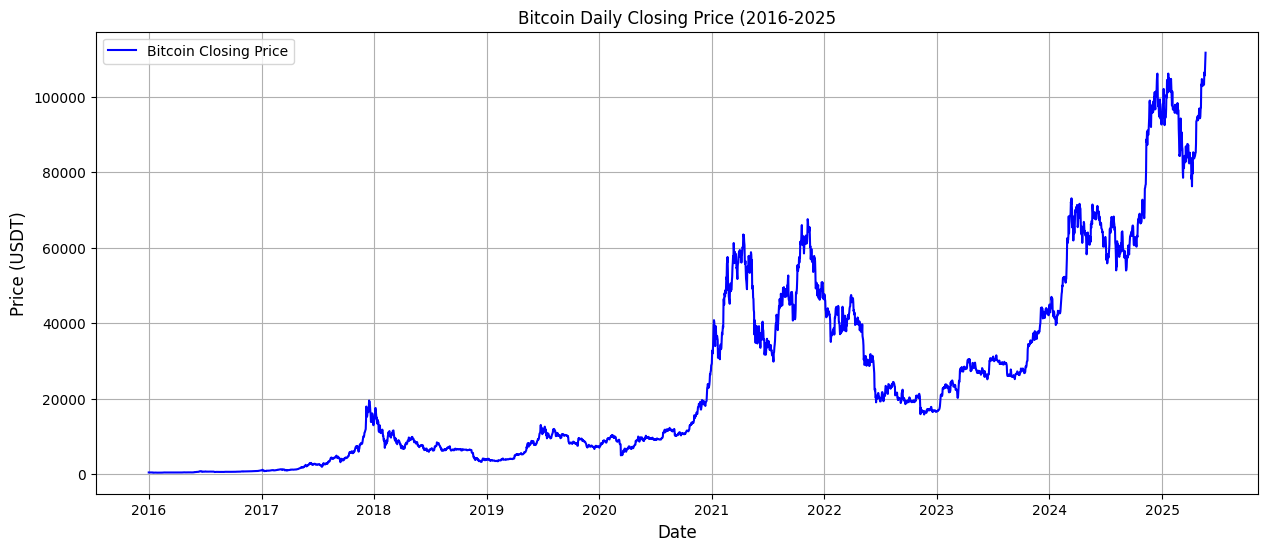

In [252]:
# Plot theb Bitcoin  prices graph
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['btc_close'], label='Bitcoin Closing Price', color='blue')
plt.title('Bitcoin Daily Closing Price (2016-2025')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USDT)', fontsize=12)
plt.legend()
plt.grid(True)


# Show the plt
plt.show()

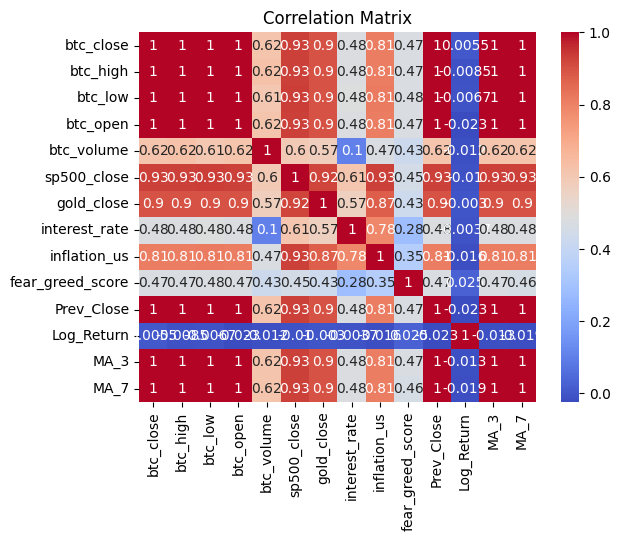

In [253]:

correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

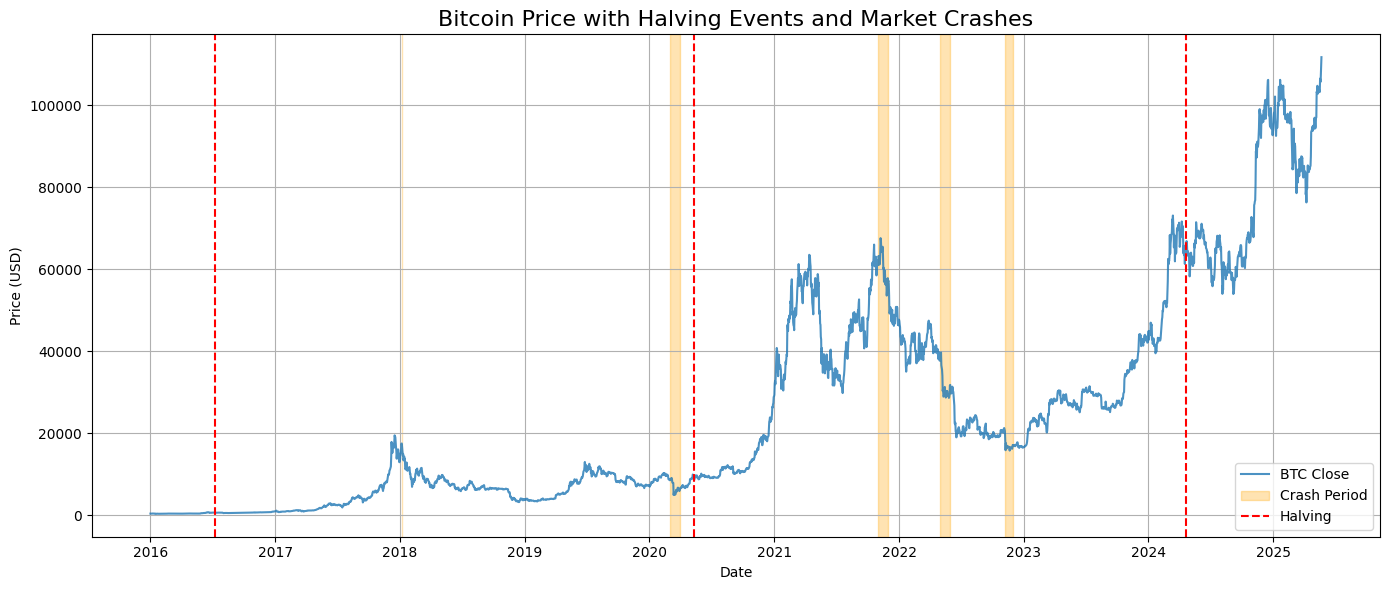

In [254]:

# Nettoyage de l'index (dates sans heures ni timezone)
df.index = pd.to_datetime(df.index).normalize()

# Définition des événements de halving et crash (sans timezone)
halving_dates = [
    pd.Timestamp("2016-07-09"),
    pd.Timestamp("2020-05-11"),
    pd.Timestamp("2024-04-20"),
]

crash_periods = [
    (pd.Timestamp("2018-01-06"), pd.Timestamp("2018-01-06")),
    (pd.Timestamp("2020-03-01"), pd.Timestamp("2020-03-31")),
    (pd.Timestamp("2021-11-01"), pd.Timestamp("2021-11-30")),
    (pd.Timestamp("2022-05-01"), pd.Timestamp("2022-05-31")),
    (pd.Timestamp("2022-11-08"), pd.Timestamp("2022-11-30")),
]

# Flags pour événements
df["halving_flag"] = df.index.isin(halving_dates)
df["crash_flag"] = False
for start, end in crash_periods:
    df.loc[start:end, "crash_flag"] = True

# Attribution de régimes
df["regime"] = "normal"
df.loc[df["halving_flag"], "regime"] = "halving"
df.loc[df["crash_flag"], "regime"] = "crash"

# Plot final
plt.figure(figsize=(14, 6))
plt.plot(df.index, df["btc_close"], label="BTC Close", alpha=0.8)

# Crashes (zones orange)
for start, end in crash_periods:
    plt.axvspan(start, end, color="orange", alpha=0.3, label="Crash Period" if start == crash_periods[0][0] else "")

# Halvings (lignes rouges)
for date in halving_dates:
    plt.axvline(date, color="red", linestyle="--", linewidth=1.5, label="Halving" if date == halving_dates[0] else "")

plt.title("Bitcoin Price with Halving Events and Market Crashes", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [263]:
df['halving_flag'] = df['halving_flag'].astype(int)
df['crash_flag']   = df['crash_flag'].astype(int)

In [264]:
df

btc_close       btc_high        btc_low       btc_open  \
date                                                                     
2016-01-01     434.334015     436.246002     427.515015     430.721008   
2016-01-02     433.437988     436.062012     431.869995     434.622009   
2016-01-03     430.010986     433.743011     424.705994     433.578003   
2016-01-04     433.091003     434.516998     429.084015     430.061005   
2016-01-05     431.959991     434.182007     429.675995     433.069000   
...                   ...            ...            ...            ...   
2025-05-18  106446.007812  106597.171875  103142.601562  103186.953125   
2025-05-19  105606.179688  107068.718750  102112.687500  106430.531250   
2025-05-20  106791.085938  107307.117188  104206.515625  105605.406250   
2025-05-21  109678.078125  110724.460938  106127.234375  106791.312500   
2025-05-22  111673.281250  111970.171875  109285.070312  109673.492188   

             btc_volume  sp500_close   gold_close  interest_rate  \
date                                                               
2016-01-01     36278900  2012.660034  1075.099976       0.340000   
2016-01-02     30096600  2012.660034  1075.099976       0.341290   
2016-01-03     39633800  2012.660034  1075.099976       0.342581   
2016-01-04     38477500  2012.660034  1075.099976       0.343871   
2016-01-05     34522600  2016.709961  1078.400024       0.345161   
...                 ...          ...          ...            ...   
2025-05-18  49887082058  5961.860026  3213.266602       4.330000   
2025-05-19  61761126647  5963.600098  3228.899902       4.330000   
2025-05-20  36515726122  5940.459961  3280.300049       4.330000   
2025-05-21  78086364051  5844.609863  3309.300049       4.330000   
2025-05-22  70157575642  5842.009766  3292.300049       4.330000   

            inflation_us  fear_greed_score     Prev_Close  Log_Return  \
date                                                                    
2016-01-01    237.652000              30.0     434.334015    0.000000   
2016-01-02    237.641806              30.0     434.334015   -0.002065   
2016-01-03    237.631613              30.0     433.437988   -0.007938   
2016-01-04    237.621419              30.0     430.010986    0.007137   
2016-01-05    237.611226              30.0     433.091003   -0.002615   
...                  ...               ...            ...         ...   
2025-05-18    320.321000              74.0  103191.085938    0.031055   
2025-05-19    320.321000              74.0  106446.007812   -0.007921   
2025-05-20    320.321000              74.0  105606.179688    0.011158   
2025-05-21    320.321000              74.0  106791.085938    0.026675   
2025-05-22    320.321000              74.0  109678.078125    0.018028   

                     MA_3           MA_7  halving_flag  crash_flag  regime  \
date                                                                         
2016-01-01     434.334015     434.334015             0           0  normal   
2016-01-02     433.886002     433.886002             0           0  normal   
2016-01-03     432.594330     432.594330             0           0  normal   
2016-01-04     432.179993     432.718498             0           0  normal   
2016-01-05     431.687327     432.566797             0           0  normal   
...                   ...            ...           ...         ...     ...   
2025-05-18  104375.460938  103913.314732             0           0  normal   
2025-05-19  105081.091146  104312.347098             0           0  normal   
2025-05-20  106281.091146  104686.814732             0           0  normal   
2025-05-21  107358.447917  105563.766741             0           0  normal   
2025-05-22  109380.815104  106696.429688             0           0  normal   

             returns  
date                  
2016-01-01       NaN  
2016-01-02 -0.002063  
2016-01-03 -0.007907  
2016-01-04  0.007163  
2016-01-05 -0.002611  
...              ...  
2025-05-18  0.03154

In [265]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df["btc_close"].dropna())

print("ADF Test Statistic:", adf_result[0])
print("p-value:", adf_result[1])
for key, value in adf_result[4].items():
    print(f"Critical Value ({key}): {value}")

if adf_result[1] < 0.05:
    print("Série stationnaire")
else:
    print("Série non stationnaire")

ADF Test Statistic: 0.35846961601803046
p-value: 0.9798736287973067
Critical Value (1%): -3.4322742112538958
Critical Value (5%): -2.8623902053483077
Critical Value (10%): -2.567222580397986
Série non stationnaire


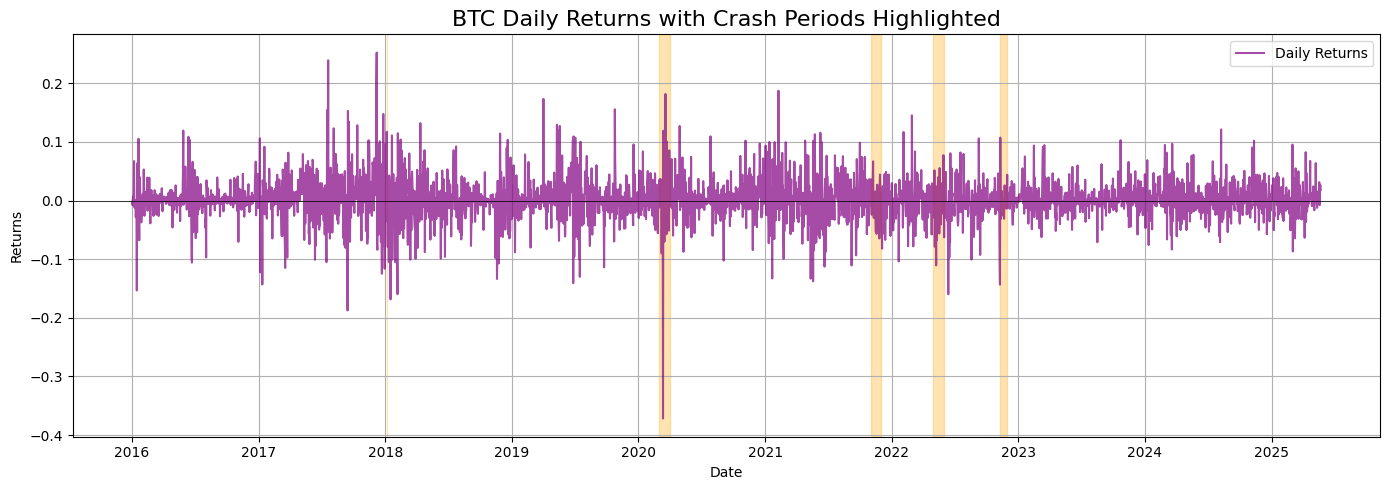

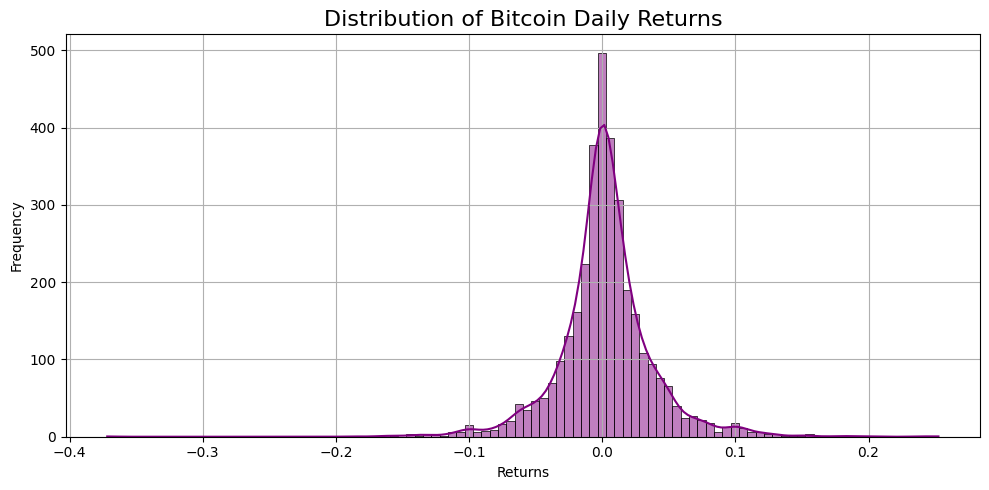

In [266]:
import seaborn as sns
# Returns volatility
df["returns"] = df["btc_close"].pct_change()

plt.figure(figsize=(14, 5))
plt.plot(df.index, df["returns"], color="purple", alpha=0.7, label="Daily Returns")
plt.axhline(0, color="black", linewidth=0.5)

for start, end in crash_periods:
    plt.axvspan(start, end, color="orange", alpha=0.3)

plt.title("BTC Daily Returns with Crash Periods Highlighted", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df["returns"].dropna(), kde=True, bins=100, color="purple")
plt.title("Distribution of Bitcoin Daily Returns", fontsize=16)
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

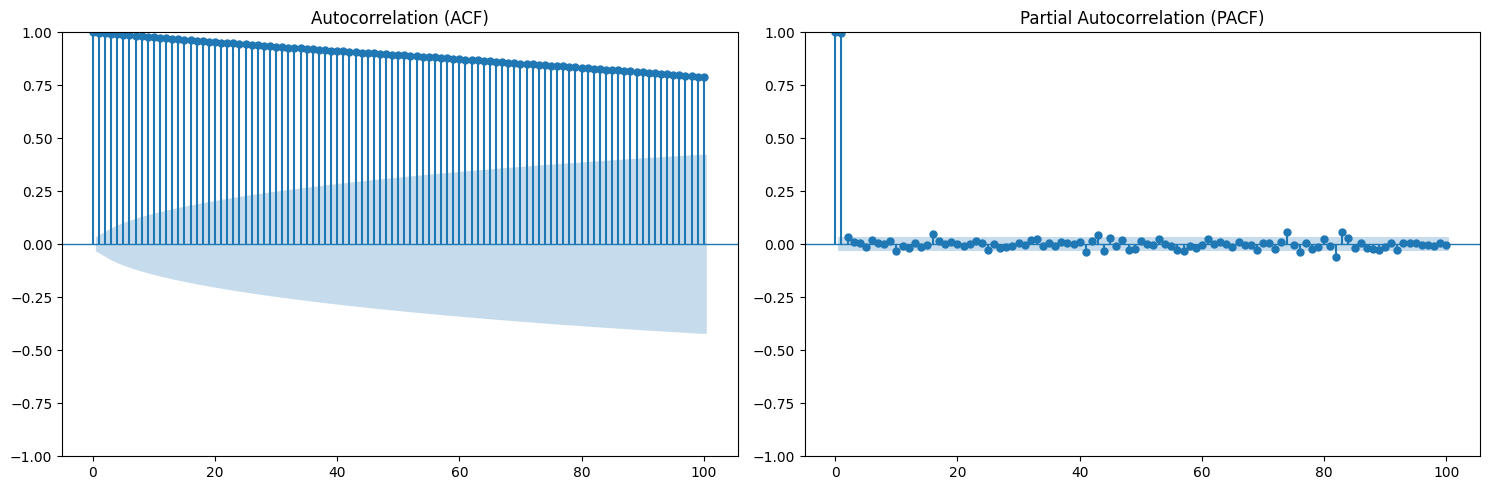

In [267]:
# Autocorrelation and Partial Autocorrelation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(df["btc_close"].dropna(), ax=axes[0], lags=100, linewidth=1)
axes[0].set_title("Autocorrelation (ACF)")

plot_pacf(df["btc_close"].dropna(), ax=axes[1], lags=100, method="ywm", linewidth=1)
axes[1].set_title("Partial Autocorrelation (PACF)")

plt.tight_layout()
plt.show()

In [268]:
# How BTC moves around halving/crash events.
print(df.groupby("regime")["btc_close"].agg(["mean","std","count"]))

                 mean           std  count
regime                                    
crash    29442.007455  20818.013623    116
halving  24749.065776  35079.504594      3
normal   25141.280230  26242.796861   3311


# Data Preparation for Models

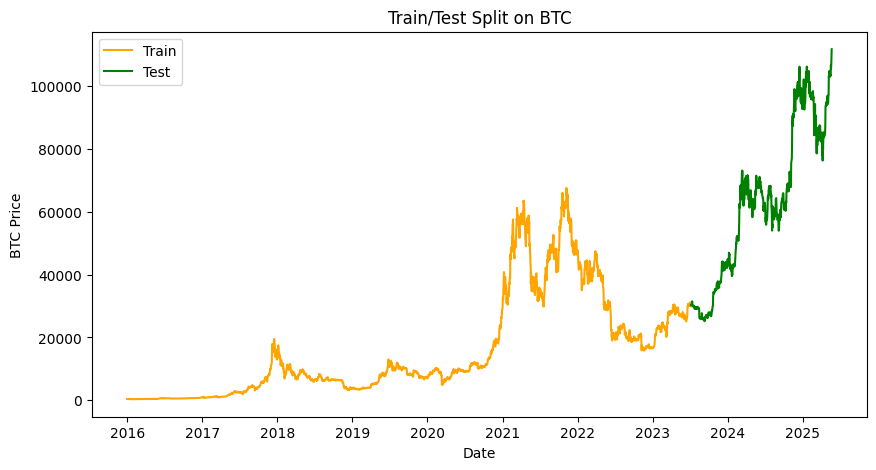

In [269]:
split_size = int(0.8 * len(df))
X_train = df.index[:split_size]
y_train = df['btc_close'][:split_size]

X_test = df.index[split_size:]
y_test = df['btc_close'][split_size:]


plt.figure(figsize=(10, 5))
plt.plot(X_train, y_train, label='Train', color='orange')
plt.plot(X_test, y_test, label='Test', color='green')
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title("Train/Test Split on BTC")
plt.legend()
plt.show()


In [270]:
y_train.head(1)

date
2016-01-01    434.334015
Freq: D, Name: btc_close, dtype: float64

In [271]:
y_test.head(1)

date
2023-07-07    30342.265625
Freq: D, Name: btc_close, dtype: float64

# Auto Arima

In [ ]:
param_grid = {
    "trend":"t",
    "m": 7,  # Seasonal periodicity (e.g., 12 for monthly data)
    "stepwise":
        True,
      # Whether to use stepwise search for model selection
    "error_action": "ignore",  # Action on error ('warn', 'raise', 'ignore')
    "scoring": "mse",  # Scoring metric ('mse' for mean squared error)
    "start_p": 1,  # Start for auto ARIMA
    "d": None,  # Differencing parameter (None for automatic)
    "start_q": 1,  # Start for auto ARIMA
    "max_p":5,  # Maximum AR order
    "max_d": 2,  # Maximum differencing
    "max_q": 5,  # Maximum MA order
    "max_order": 10,  # Maximum total order
    "maxiter": 50,  # Maximum number of iterations
    "suppress_warnings": True,  # Suppress warnings
    "information_criterion": "aic",  # Information criterion for model selection
    "method": "lbfgs", # methode de hyperparameter tuning
    "trend_offset": 1,  # Offset for trend
    "solver": "lbfgs",  # Solver for optimization
    "start_params": None,  # Starting parameters
    "return_valid_fits": False,  # Whether to return valid fits
}



model = pm(y_train["close"], **param_grid, trace=True)
_tmp = model.summary().tables[0]
assert _tmp.data[1][0] == "Model:"
print (_tmp.data)
auto_ariba_bestfit_nm = _tmp.data[1][1] #le nom du modele
auto_ariba_bestfit_cls = model # la classe du modele
is_fitted = True

'param_grid = {\n    "trend":"t",\n    "m": 7,  # Seasonal periodicity (e.g., 12 for monthly data)\n    "stepwise":\n        True,\n      # Whether to use stepwise search for model selection\n    "error_action": "ignore",  # Action on error (\'warn\', \'raise\', \'ignore\')\n    "scoring": "mse",  # Scoring metric (\'mse\' for mean squared error)\n    "start_p": 1,  # Start for auto ARIMA\n    "d": None,  # Differencing parameter (None for automatic)\n    "start_q": 1,  # Start for auto ARIMA\n    "max_p":5,  # Maximum AR order\n    "max_d": 2,  # Maximum differencing\n    "max_q": 5,  # Maximum MA order\n    "max_order": 10,  # Maximum total order\n    "maxiter": 50,  # Maximum number of iterations\n    "suppress_warnings": True,  # Suppress warnings\n    "information_criterion": "aic",  # Information criterion for model selection\n    "method": "lbfgs", # methode de hyperparameter tuning\n    "trend_offset": 1,  # Offset for trend\n    "solver": "lbfgs",  # Solver for optimization\n 

In [ ]:
f_horizon=len(y_test)
forecast, conf_int = model.predict(
    n_periods=f_horizon, return_conf_int=True
)
conf_int = pd.DataFrame(conf_int)
conf_int.columns = ["lower", "upper"]

forecast_df = pd.DataFrame({"ds": forecast.index, "yhat": forecast.values})

fcast = pd.concat([forecast_df, conf_int], axis=1)



In [ ]:
backtest, backtest_conf_int = model.predict_in_sample(
    return_conf_int=True
)
conf_int_backtest = pd.DataFrame(backtest_conf_int)
conf_int_backtest.columns = ["lower", "upper"]
backtest_df = pd.DataFrame({"ds": backtest.index, "yhat": backtest.values})
bktest = pd.concat([backtest_df, conf_int_backtest], axis=1)

In [ ]:
bktest

ds          yhat         lower         upper
0   2023-02-11      0.435691  -3045.438743   3046.310126
1   2023-02-12  20323.236746  18001.626743  22644.846748
2   2023-02-13  21793.911873  19479.316458  24108.507287
3   2023-02-14  21776.492356  19461.896942  24091.087771
4   2023-02-15  22149.587760  19834.992347  24464.183172
..         ...           ...           ...           ...
465 2024-05-21  70825.552674  68541.024642  73110.080705
466 2024-05-22  70425.773688  68141.245656  72710.301719
467 2024-05-23  69732.676326  67448.148294  72017.204358
468 2024-05-24  68025.739021  65741.210989  70310.267052
469 2024-05-25  68630.793203  66346.265171  70915.321234

[470 rows x 4 columns]

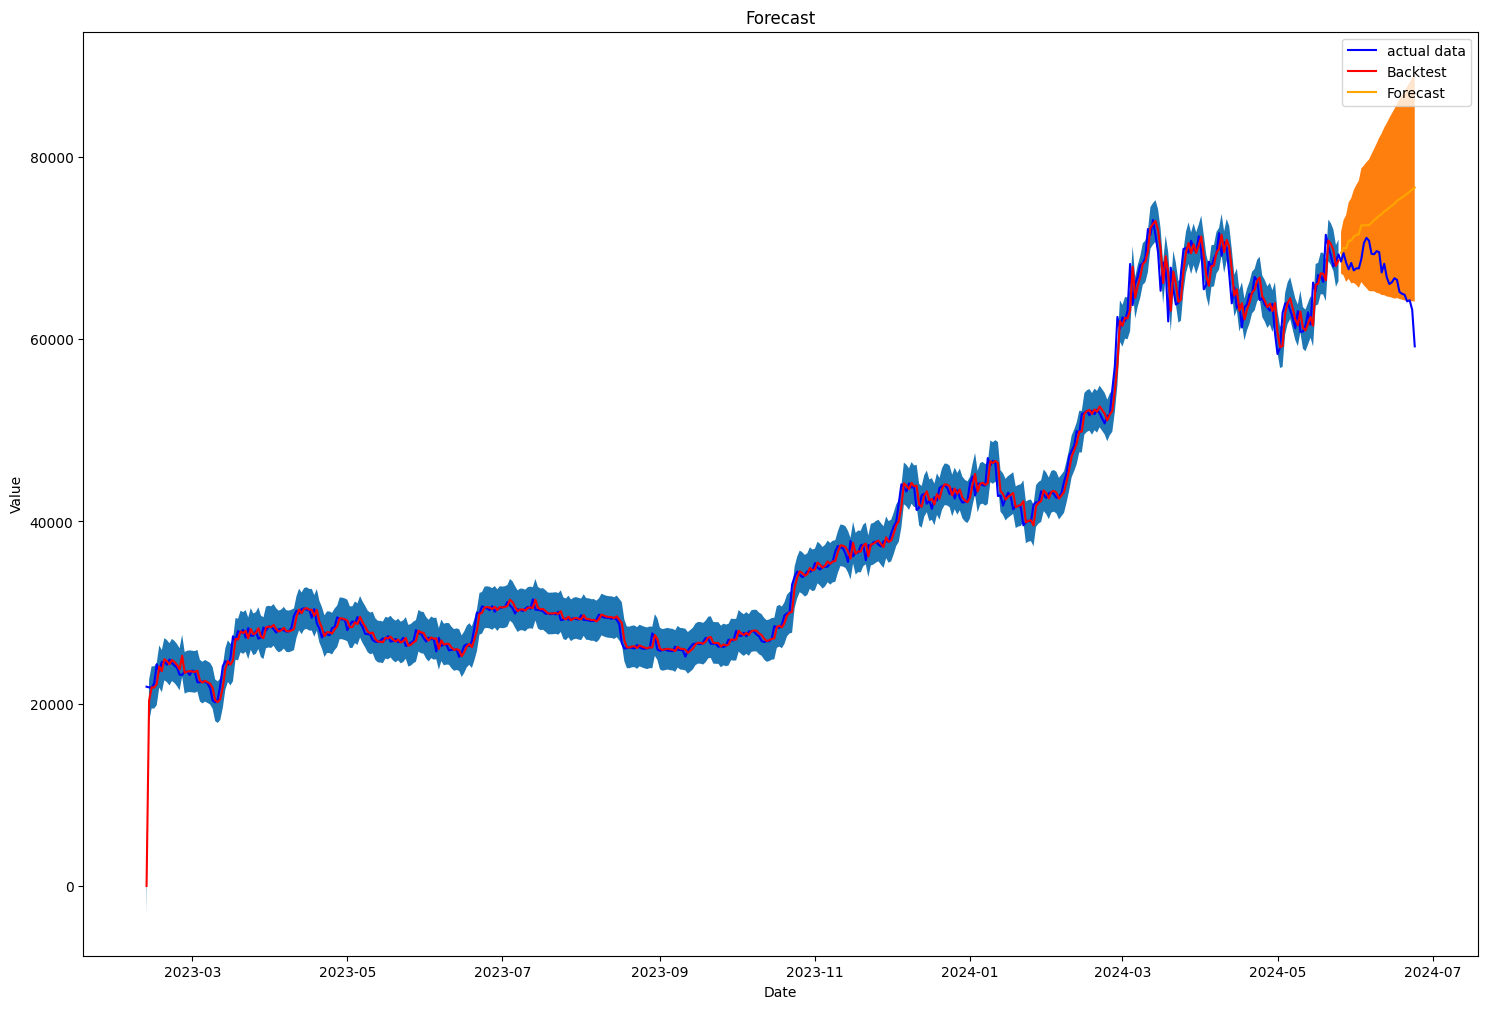

In [ ]:
def plot_forecast(forecast):
    plt.figure(figsize=(18, 12))
    plt.plot(
        df.index,
        df["btc_close"],
        label="actual data",
        color="blue",
    )

    plt.plot(
        bktest["ds"],
        bktest["yhat"],
        label="Backtest",
        color="red",
    )
    plt.fill_between(bktest["ds"], bktest["lower"],bktest["upper"])

    plt.plot(
        fcast["ds"],
        fcast["yhat"],
        label="Forecast",
        color="orange",
    )
    plt.fill_between(fcast["ds"], fcast["lower"],fcast["upper"])
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.title("Forecast")
    plt.legend()
    plt.show()

plot_forecast(forecast)

# Prophet

In [ ]:
# Prepare the data for Prophet
# Ensure the 'date' column is in datetime format
df=df.copy().reset_index(drop=False)
df.rename(columns={'date': 'ds', 'btc_close': 'y'}, inplace=True)

rmses= list ()

param_grid={
    "daily_seasonality": [False, True],
    "weekly_seasonality":[False, True],
    "yearly_seasonality":[True, False],
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5], # to give higher value to prior trend
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0] # to control the flexibility of seasonality components
}

all_params= [
            dict(zip(param_grid.keys(), v))
            for v in itertools.product(*param_grid.values())
]

print(all_params)

# go through each combinations
for params in all_params:
    m= Prophet(**params)

    m= m.add_seasonality(name= 'monthly', period=15, fourier_order=5)
    m= m.add_seasonality(name= "quarterly", period= 30, fourier_order= 10)
    m.fit(df)


    df_cv= cross_validation(m, initial="30 days", period="30 days", horizon="30 days")

    df_p= performance_metrics(df_cv, rolling_window=1)

    rmses.append(df_p['rmse'].values[0])

# find the best parameters
best_params = all_params[np.argmin(rmses)]

print("\n The best parameters are:", best_params)

[{'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01}, {'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1}, {'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 1.0}, {'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0}, {'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01}, {'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1}, {'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': 

16:37:32 - cmdstanpy - INFO - Chain [1] start processing
16:37:34 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/112 [00:00<?, ?it/s]16:37:34 - cmdstanpy - INFO - Chain [1] start processing
16:37:34 - cmdstanpy - INFO - Chain [1] done processing
  1%|          | 1/112 [00:00<00:50,  2.18it/s]16:37:34 - cmdstanpy - INFO - Chain [1] start processing
16:37:35 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 2/112 [00:01<01:03,  1.74it/s]16:37:35 - cmdstanpy - INFO - Chain [1] start processing
16:37:35 - cmdstanpy - INFO - Chain [1] done processing
16:37:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
16:37:35 - cmdstanpy - INFO - Chain [1] start processing
16:37:35 - cmdstanpy - INFO - Chain [1] done processing
  3%|▎         | 3/112 [00:01<00:59,  1.83


 The best parameters are: {'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0}


In [ ]:
{'changepoint_range': 0.8, 'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.01}

In [ ]:
model = Prophet(**{'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0})
model.fit(df)

# Create future dates for prediction
future = model.make_future_dataframe(periods=30)

# Make predictions
forecast = model.predict(future)


01:32:09 - cmdstanpy - INFO - Chain [1] start processing
01:32:10 - cmdstanpy - INFO - Chain [1] done processing


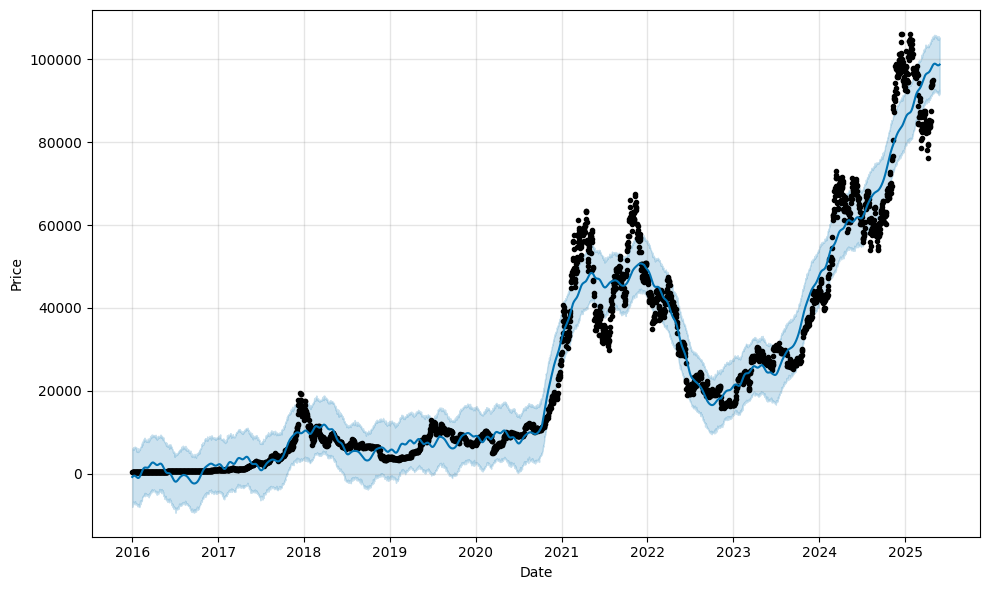

In [65]:
figure_1 = model.plot(forecast,
                    xlabel='Date',
                    ylabel='Price')


In [272]:
df

btc_close       btc_high        btc_low       btc_open  \
date                                                                     
2016-01-01     434.334015     436.246002     427.515015     430.721008   
2016-01-02     433.437988     436.062012     431.869995     434.622009   
2016-01-03     430.010986     433.743011     424.705994     433.578003   
2016-01-04     433.091003     434.516998     429.084015     430.061005   
2016-01-05     431.959991     434.182007     429.675995     433.069000   
...                   ...            ...            ...            ...   
2025-05-18  106446.007812  106597.171875  103142.601562  103186.953125   
2025-05-19  105606.179688  107068.718750  102112.687500  106430.531250   
2025-05-20  106791.085938  107307.117188  104206.515625  105605.406250   
2025-05-21  109678.078125  110724.460938  106127.234375  106791.312500   
2025-05-22  111673.281250  111970.171875  109285.070312  109673.492188   

             btc_volume  sp500_close   gold_close  interest_rate  \
date                                                               
2016-01-01     36278900  2012.660034  1075.099976       0.340000   
2016-01-02     30096600  2012.660034  1075.099976       0.341290   
2016-01-03     39633800  2012.660034  1075.099976       0.342581   
2016-01-04     38477500  2012.660034  1075.099976       0.343871   
2016-01-05     34522600  2016.709961  1078.400024       0.345161   
...                 ...          ...          ...            ...   
2025-05-18  49887082058  5961.860026  3213.266602       4.330000   
2025-05-19  61761126647  5963.600098  3228.899902       4.330000   
2025-05-20  36515726122  5940.459961  3280.300049       4.330000   
2025-05-21  78086364051  5844.609863  3309.300049       4.330000   
2025-05-22  70157575642  5842.009766  3292.300049       4.330000   

            inflation_us  fear_greed_score     Prev_Close  Log_Return  \
date                                                                    
2016-01-01    237.652000              30.0     434.334015    0.000000   
2016-01-02    237.641806              30.0     434.334015   -0.002065   
2016-01-03    237.631613              30.0     433.437988   -0.007938   
2016-01-04    237.621419              30.0     430.010986    0.007137   
2016-01-05    237.611226              30.0     433.091003   -0.002615   
...                  ...               ...            ...         ...   
2025-05-18    320.321000              74.0  103191.085938    0.031055   
2025-05-19    320.321000              74.0  106446.007812   -0.007921   
2025-05-20    320.321000              74.0  105606.179688    0.011158   
2025-05-21    320.321000              74.0  106791.085938    0.026675   
2025-05-22    320.321000              74.0  109678.078125    0.018028   

                     MA_3           MA_7  halving_flag  crash_flag  regime  \
date                                                                         
2016-01-01     434.334015     434.334015             0           0  normal   
2016-01-02     433.886002     433.886002             0           0  normal   
2016-01-03     432.594330     432.594330             0           0  normal   
2016-01-04     432.179993     432.718498             0           0  normal   
2016-01-05     431.687327     432.566797             0           0  normal   
...                   ...            ...           ...         ...     ...   
2025-05-18  104375.460938  103913.314732             0           0  normal   
2025-05-19  105081.091146  104312.347098             0           0  normal   
2025-05-20  106281.091146  104686.814732             0           0  normal   
2025-05-21  107358.447917  105563.766741             0           0  normal   
2025-05-22  109380.815104  106696.429688             0           0  normal   

             returns  
date                  
2016-01-01       NaN  
2016-01-02 -0.002063  
2016-01-03 -0.007907  
2016-01-04  0.007163  
2016-01-05 -0.002611  
...              ...  
2025-05-18  0.03154

# LSTM

In [ ]:
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.w_att = self.add_weight(name='w_att',
                                     shape=(input_shape[-1], 1),
                                     initializer='random_normal',
                                     trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, inputs):
        score = K.tanh(K.dot(inputs, self.w_att))
        attention_weights = K.softmax(score, axis=1)
        context_vector = attention_weights * inputs
        context_vector = K.sum(context_vector, axis=1)
        return context_vector

class LSTMTrainer:
    def __init__(self, df):
        self.target_data = df.copy().reset_index()
        self.target_data = df[[
            "btc_close", "btc_volume", "Prev_Close", "Log_Return", "MA_3", "MA_7",
            "sp500_close", "gold_close", "interest_rate", "inflation_us",
            "fear_greed_score", "halving_flag", "crash_flag"
        ]]
        self.model = None
        self.history = None
        self.scaler = None

    def build_model_tuner(self, hp):

        n_features = self.target_data.shape[1]

        model = Sequential()
        units_1   = hp.Choice('units_1', [32, 64, 128], default=64)
        dropout_1 = hp.Float('dropout_1', 0.1, 0.4, step=0.1, default=0.2)
        model.add(LSTM(units_1, return_sequences=True, input_shape=(time_step, n_features),
                       kernel_regularizer=regularizers.l2(1e-4)))
        model.add(Dropout(dropout_1))

        units_2   = hp.Choice('units_2', [16, 32, 64], default=32)
        dropout_2 = hp.Float('dropout_2', 0.1, 0.4, step=0.1, default=0.2)
        model.add(LSTM(units_2, return_sequences=False, kernel_regularizer=regularizers.l2(1e-4)))
        model.add(Dropout(dropout_2))

        model.add(Dense(1, kernel_regularizer=regularizers.l2(1e-4)))

        learning_rate = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4], default=1e-3)
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
            loss='mean_squared_error',
            metrics=['mean_absolute_percentage_error']
        )
        return model

    def tune_model(self, X_train, y_train, X_val, y_val):
        """
        Méthode pour lancer la recherche d'hyperparamètres avec Keras Tuner.
        """
       
        tuner = kt.RandomSearch(
            self.build_model_tuner,
            objective='val_loss',
            max_trials=10,
            executions_per_trial=1,
            directory='kt_dir',
            project_name='btc_lstm_tuning_class'
        )

       
        tuner.search(
            x=X_train,
            y=y_train,
            epochs=30,
            batch_size=32,
            validation_data=(X_val, y_val),
            verbose=1
        )

        best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
        print("----- Best parameters founded -----")
        print(f"units_1       : {best_hps.get('units_1')}")
        print(f"dropout_1     : {best_hps.get('dropout_1'):.2f}")
        print(f"units_2       : {best_hps.get('units_2')}")
        print(f"dropout_2     : {best_hps.get('dropout_2'):.2f}")
        print(f"learning_rate : {best_hps.get('learning_rate'):.4f}")
    
        return best_hps

    def prepare_dataset(self, training_size, time_step=60):
        self.scaler = MinMaxScaler(feature_range=(0, 1))
        data_scaled = self.scaler.fit_transform(self.target_data.values)

        train_len = int(len(data_scaled) * training_size)
        train_data = data_scaled[:train_len]
        test_data  = data_scaled[train_len:]

        def _create_dataset(dataset, time_step=60):
            dataX, dataY = [], []
            for i in range(len(dataset) - time_step - 1):
                seq_X = dataset[i:(i + time_step), :]
                seq_Y = dataset[i + time_step, 0]
                dataX.append(seq_X)
                dataY.append(seq_Y)
            return np.array(dataX), np.array(dataY)

        X_train, y_train = _create_dataset(train_data, time_step)
        X_test,  y_test  = _create_dataset(test_data,  time_step)

        print(f"X_train shape: {X_train.shape}")
        print(f"X_test shape : {X_test.shape}")
        return X_train, y_train, X_test, y_test

    def create_model(self, X_train):
        time_step = X_train.shape[1]
        n_features = X_train.shape[2]

        inputs = Input(shape=(time_step, n_features))
        x = Bidirectional(LSTM(64, return_sequences=True,
                                kernel_regularizer=regularizers.l2(1e-4)))(inputs)
        x = Dropout(0.3)(x)
        x = Bidirectional(LSTM(32, return_sequences=True,
                                kernel_regularizer=regularizers.l2(1e-4)))(x)
        x = Dropout(0.3)(x)
        x = Attention()(x)
        outputs = Dense(1, kernel_regularizer=regularizers.l2(1e-4))(x)

        model = Model(inputs=inputs, outputs=outputs)
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                      loss='mean_squared_error',
                      metrics=['mean_absolute_percentage_error'])
        self.model = model
        print(model.summary())
        return self.model

    def train_model(self, X_train, y_train, X_test, y_test):
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
        checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

        self.history = self.model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            epochs=100,
            batch_size=32,
            verbose=1,
            callbacks=[early_stopping, reduce_lr, checkpoint]
        )

        plt.figure(figsize=(8, 5))
        plt.plot(self.history.history['loss'], label='Training Loss')
        plt.plot(self.history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss Over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss (MSE)')
        plt.legend()
        plt.show()

        return self.history

    def inference_model(self, X_train, y_train, X_test, y_test):
        try:
            self.model.load_weights('best_model.h5')
        except:
            pass

        train_predict = self.model.predict(X_train)
        test_predict  = self.model.predict(X_test)

        close_scaler = MinMaxScaler(feature_range=(0, 1))
        close_data = self.target_data['btc_close'].values.reshape(-1, 1)
        close_scaler.fit(close_data)

        train_pred_rescaled = close_scaler.inverse_transform(train_predict).flatten()
        test_pred_rescaled  = close_scaler.inverse_transform(test_predict).flatten()
        y_train_rescaled    = close_scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
        y_test_rescaled     = close_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

        rmse_train = math.sqrt(mean_squared_error(y_train_rescaled, train_pred_rescaled))
        rmse_test  = math.sqrt(mean_squared_error(y_test_rescaled, test_pred_rescaled))
        mape_test  = np.mean(np.abs((y_test_rescaled - test_pred_rescaled) / y_test_rescaled)) * 100
        mae_test   = mean_absolute_error(y_test_rescaled, test_pred_rescaled)
        r2_test    = r2_score(y_test_rescaled, test_pred_rescaled)

        print(f" RMSE Train: {rmse_train:.2f}")
        print(f" RMSE Test : {rmse_test:.2f}")
        print(f" MAPE Test: {mape_test:.2f}%")
        print(f" MAE Test : {mae_test:.2f}")
        print(f"R2 Test  : {r2_test:.4f}")

        total_close = close_scaler.inverse_transform(close_data).flatten()
        look_back   = X_train.shape[1]  # ex. 60

        train_predict_plot = np.empty_like(total_close)
        train_predict_plot[:] = np.nan
        train_predict_plot[look_back:look_back + len(train_pred_rescaled)] = train_pred_rescaled

        test_predict_plot = np.empty_like(total_close)
        test_predict_plot[:] = np.nan
        start = look_back + len(train_pred_rescaled) + 1
        test_predict_plot[start:start + len(test_pred_rescaled)] = test_pred_rescaled

        plt.figure(figsize=(12, 6))
        plt.plot(total_close, label='True BTC Price', linewidth=1)
        plt.plot(train_predict_plot, label='Train Prediction', linewidth=1)
        plt.plot(test_predict_plot, label='Test Prediction', linewidth=1)
        plt.title("Bitcoin Price Prediction (Optimized LSTM + Attention)")
        plt.xlabel("Time step")
        plt.ylabel("BTC Price")
        plt.legend()
        plt.show()



In [349]:
trainer = LSTMTrainer(df = df)

In [ ]:
time_step=60
X_train, y_train, X_val, y_val = trainer.prepare_dataset(training_size=0.7, time_step=time_step)

X_train shape: (2340, 60, 13)
X_test shape : (968, 60, 13)


In [351]:
best_hps = trainer.tune_model(X_train, y_train, X_val, y_val)

Trial 10 Complete [00h 00m 43s]
val_loss: 0.003897778457030654

Best val_loss So Far: 0.002337146084755659
Total elapsed time: 00h 09m 40s
----- Meilleurs hyperparamètres trouvés -----
units_1       : 128
dropout_1     : 0.40
units_2       : 32
dropout_2     : 0.10
learning_rate : 0.0100


X_train shape: (2340, 60, 13)
X_test shape : (968, 60, 13)
Reloading Tuner from kt_dir\btc_lstm_tuning_class\tuner0.json
----- Meilleurs hyperparamètres trouvés -----
units_1       : 128
dropout_1     : 0.40
units_2       : 32
dropout_2     : 0.10
learning_rate : 0.0100
Epoch 1/100


c:\Users\Sabrine\Desktop\BTC_Forecasting\btc_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/74 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1545 - mean_absolute_percentage_error: 884.5787
Epoch 1: val_loss improved from inf to 0.01570, saving model to best_model.h5


74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.1518 - mean_absolute_percentage_error: 873.8017 - val_loss: 0.0157 - val_mean_absolute_percentage_error: 5.4767 - learning_rate: 0.0100
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0145 - mean_absolute_percentage_error: 205.9659
Epoch 2: val_loss improved from 0.01570 to 0.01176, saving model to best_model.h5


74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0145 - mean_absolute_percentage_error: 205.7535 - val_loss: 0.0118 - val_mean_absolute_percentage_error: 6.1630 - learning_rate: 0.0100
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0103 - mean_absolute_percentage_error: 142.1508
Epoch 3: val_loss improved from 0.01176 to 0.01135, saving model to best_model.h5


74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0103 - mean_absolute_percentage_error: 142.0651 - val_loss: 0.0114 - val_mean_absolute_percentage_error: 8.9354 - learning_rate: 0.0100
Epoch 4/100
72/74 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0080 - mean_absolute_percentage_error: 147.3671
Epoch 4: val_loss improved from 0.01135 to 0.00860, saving model to best_model.h5


74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0080 - mean_absolute_percentage_error: 147.0611 - val_loss: 0.0086 - val_mean_absolute_percentage_error: 7.6606 - learning_rate: 0.0100
Epoch 5/100
72/74 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0061 - mean_absolute_percentage_error: 120.6401
Epoch 5: val_loss did not improve from 0.00860
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0061 - mean_absolute_percentage_error: 120.1632 - val_loss: 0.0125 - val_mean_absolute_percentage_error: 15.4502 - learning_rate: 0.0100
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0051 - mean_absolute_percentage_error: 141.8224
Epoch 6: val_loss did not improve from 0.00860
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0051 - mean_absolute_percentage_error: 141.6784 - val_loss: 0.0099 - val_mean_absolute_percentage_error: 14.9811 - learning_rate: 0.0100
Epoch 7/100
72/74 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0042 - mean_absolute_percentage_error: 109.3768
Epoch 7: val_los

74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0042 - mean_absolute_percentage_error: 109.0818 - val_loss: 0.0048 - val_mean_absolute_percentage_error: 5.1711 - learning_rate: 0.0100
Epoch 8/100
71/74 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0035 - mean_absolute_percentage_error: 132.5005
Epoch 8: val_loss did not improve from 0.00476
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0035 - mean_absolute_percentage_error: 131.2000 - val_loss: 0.0077 - val_mean_absolute_percentage_error: 10.6080 - learning_rate: 0.0100
Epoch 9/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0030 - mean_absolute_percentage_error: 120.8196
Epoch 9: val_loss did not improve from 0.00476
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0030 - mean_absolute_percentage_error: 120.6955 - val_loss: 0.0064 - val_mean_absolute_percentage_error: 8.1850 - learning_rate: 0.0100
Epoch 10/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0027 - mean_absolute_percentage_error: 142.4561
Epoch 10: val_lo

74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0027 - mean_absolute_percentage_error: 142.4392 - val_loss: 0.0047 - val_mean_absolute_percentage_error: 7.9548 - learning_rate: 0.0100
Epoch 11/100
71/74 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0023 - mean_absolute_percentage_error: 97.4970
Epoch 11: val_loss did not improve from 0.00465
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0023 - mean_absolute_percentage_error: 97.8176 - val_loss: 0.0094 - val_mean_absolute_percentage_error: 16.1466 - learning_rate: 0.0100
Epoch 12/100
72/74 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0022 - mean_absolute_percentage_error: 109.4113
Epoch 12: val_loss did not improve from 0.00465
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0022 - mean_absolute_percentage_error: 109.0024 - val_loss: 0.0080 - val_mean_absolute_percentage_error: 13.6194 - learning_rate: 0.0100
Epoch 13/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0017 - mean_absolute_percentage_error: 84.1799
Epoch 13: Redu

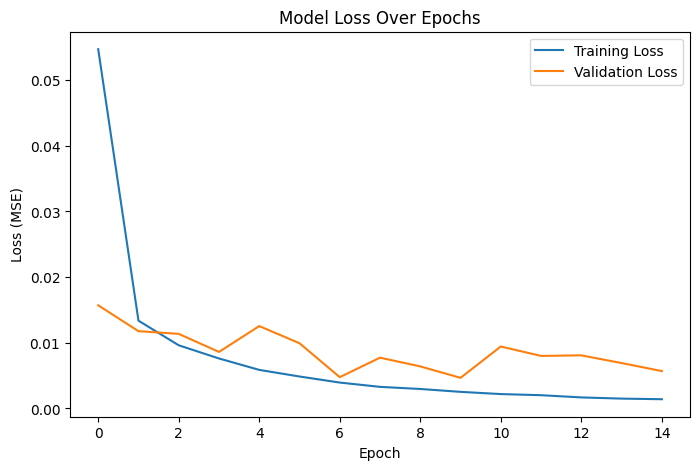

In [ ]:
trainer.model = trainer.build_model_tuner(best_hps)
trainer.train_model(X_train, y_train, X_val, y_val)


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
 RMSE Train: 2086.54
 RMSE Test : 8411.34
 MAPE Test: 9.00%
 MAE Test : 7242.44
R2 Test  : 0.7190


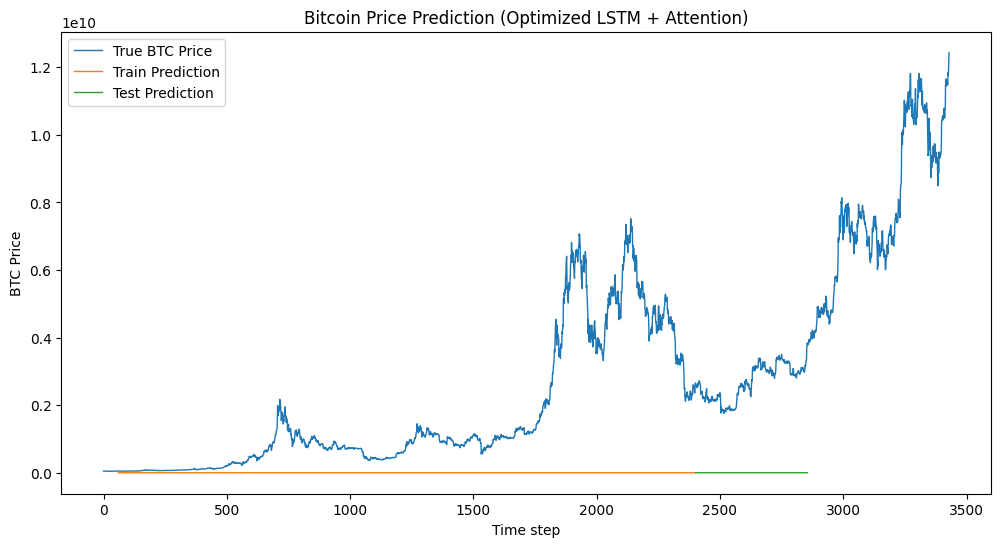

In [365]:
trainer.inference_model(X_train,y_train, X_test, y_test)